<a href="https://colab.research.google.com/github/NtimTim/DS_School_Home_Work/blob/main/Hometask/Task2_dmrf_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/4vel/python-intro/blob/main/Hometask/Task2_dmrf_visual.ipynb)

# Задание

* Используя данные об объектах недвижимости на сайте "наш.дом.рф" или cian.ru, провести мини-исследование рынка строящейся/готовой недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
#### Идеи для мини-исследования
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
* Рассчитать объемы вводимого жилья по регионам и по годам.
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
* Визуализировать разброс, связь, доли, распределение этих показателей по регионам.
* Сделать выводы по каждому из расчетов и графиков



In [ ]:
# Ваш код здесь...

In [7]:
import pickle

In [18]:
import pandas as pd


In [21]:
from google.colab import files
uploaded = files.upload()

Saving df_nashdomrf.pkl to df_nashdomrf.pkl


In [22]:
df = pickle.load(open('df_nashdomrf.pkl', 'rb'))
df.head()

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13383,39024,28105,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,37219,28101,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.shape

(11714, 110)

In [46]:
df.columns
#df.keys()

Index(['id', 'hobjId', 'pdId', 'region', 'address', 'floorMin', 'floorMax',
       'objElemLivingCnt', 'objReady100PercDt', 'wallMaterialShortDesc',
       ...
       'metro.time', 'metro.isWalk', 'metro.colors', 'complexShortNm',
       'airQualityIndexValue', 'greenAreaIndexValue',
       'developer.bankruptStage.bankruptStageCd',
       'developer.bankruptStage.bankruptStageDesc',
       'developer.bankruptStage.bankruptLawUrl',
       'developer.orgBankruptMsgDttm'],
      dtype='object', length=110)

In [115]:
df.sample(5)

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
10373,40688,121199,462016,50,"г Люберцы, проезд Проектируемый",24.0,26.0,919.0,2023-12-31,Панель,Другое,Нет,293.0,50320.00,50-003185,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 19:05,55.6793,37.9183,NaN,NaN,Комфорт,16-12-2023 01:38,"[{'objId': 40688, 'pdId': 462016, 'rpdId': 796...",1.0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1.0,121199,26.0,919.0,50320.0,311.0,NaN,True,31-03-2024 12:00,NaN,2.0,1.0,1.0,2.0,20.0,1.0,1.0,NaN,9.0,NaN,9.0,0.803180,181826.0,"ООО ""Первый Домостроительный комбинат"" (ИНН: 7...",1.0,"[{'metroStationNm': 'Некрасовка', 'isMetroStat...",False,info@fsk.ru,NaN,B,8.0,10470,СЗ ЮГ СТОЛИЦЫ,СЗ ЮГ СТОЛИЦЫ,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЮГ СТОЛИЦЫ,NaN,4,4.0,Московская область,+7(495)660-15-55,fsk.ru,info@fsk.ru,7708333289,1187746672233,500101001,"Московская область, г Балашиха, улица Некрасов...","Московская область, г. Балашиха, улица Некрасо...",796843,NaN,50.0,Бажин Иван Алексеевич,ФСК,4,Общество с ограниченной ответственностью,ООО,5805.0,1.0,NaN,"2,74 - 3,24",335.0,333.0,205.0,46.0,919.0,9.0,5.0,ЖК Первый Лермонтовский,NaN,NaN,98.641,Некрасовка,Некрасовская,#CC0066,27.15,NaN,[#CC0066],NaN,8.0,NaN,NaN,NaN,NaN,NaN
8092,45322,125943,448073,26,"г Ессентуки, ул Шмидта, д. 100, корпус 5",10.0,10.0,64.0,2023-12-31,Монолит-кирпич,Без отделки,Есть,29.0,3093.10,26-000711,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-11-2023 11:46,44.0425,42.8979,NaN,NaN,Типовой,16-12-2023 01:38,"[{'objId': 45322, 'pdId': 448073, 'rpdId': 794...",1.0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1.0,125943,10.0,64.0,3093.1,3.0,NaN,True,30-12-2023 12:00,NaN,1.0,1.0,1.0,9.0,20.0,1.0,1.0,NaN,1.0,NaN,1.0,0.545278,86323.0,"ООО Строительная компания ""Строй Актив"" (ИНН: ...",1.0,[],False,oooskvostok@inbox.ru,NaN,B,7.0,1383,СЗ СК ВОСТОК,СЗ СК ВОСТОК,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК СТРОИТЕЛЬНАЯ КОМ...,NaN,

In [60]:
pd.set_option('display.max_columns',None)
#df.columns.tolist()
df.head()

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 15:23,57.1519,65.5544,0,0,Элитный,16-12-2023 01:38,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 8028...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,0,34754,1,0,0.0,0,0,True,28-02-2025 12:00,0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,8.0,7.0,15,0.917243,50768.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,[],False,info@2mengroup.ru,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",804699,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,Нет,0,6251.10,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 15:23,57.1519,65.5544,0,0,Элитный,16-12-2023 01:38,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 8028...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37201,12,65,6251.1,70,0,True,28-02-2025 12:00,0,1.0,1.0,1.0,11.0,10.0,1,1,0.0,5.0,4.0,9,0.999984,47163.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,[],False,info@2mengroup.ru,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",804699,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,"2,96",0.0,24.0,

In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df_no_NaN = df.loc[df['objPriceAvg'].notnull()]
df_region_price_series = df_no_NaN.groupby('region', as_index=True)['objPriceAvg'].mean()
df_region_price_series

region
1      97175.000000
2     102701.614035
3      83158.040816
4     110104.777778
5      56562.166667
          ...      
86    110474.466667
89    144591.076923
91    139035.682759
92    141886.416667
93    114752.000000
Name: objPriceAvg, Length: 82, dtype: float64

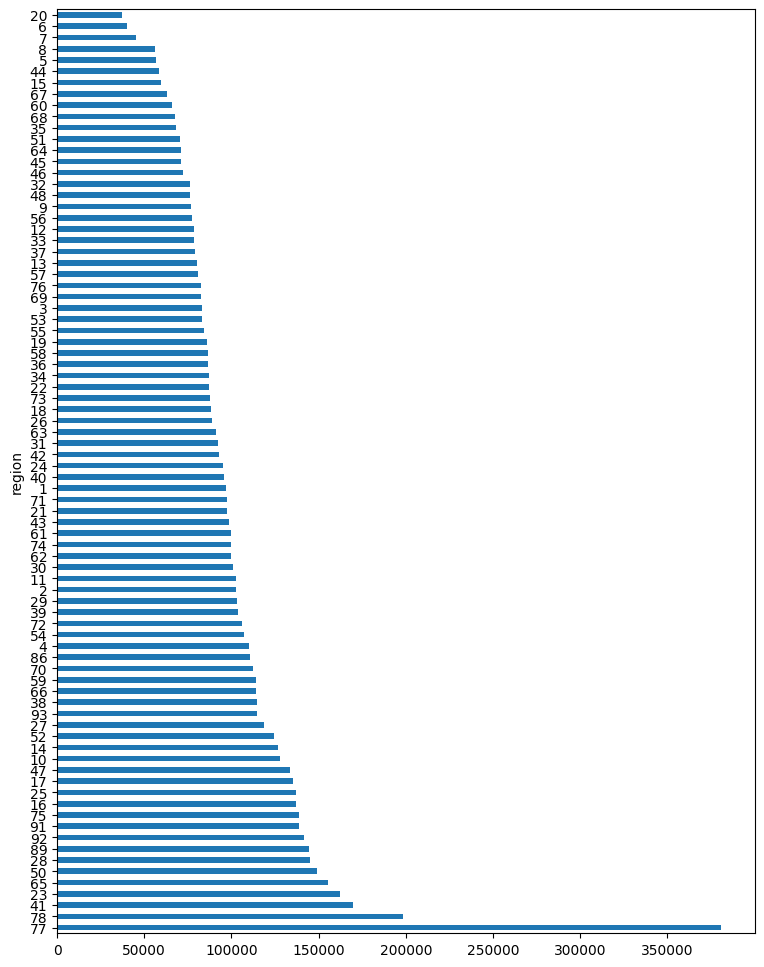

In [114]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
df_region_price_series.sort_values(ascending=False).plot(kind='barh')
plt.show()


In [ ]:
#Делаем выводы^
# самые высокие средние цены в 77 регионе -Москва,
# на втором месте 78 регион - Санкт-Петербург,
# на третьем 41 регион - Петропавлоовск-Камчатский
# самые низкие в 20 регионе - Грозный

In [ ]:
TO DO продолжение следует, промежуточное сохранение чтобы не потерять